# Working With Data

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [8]:
# configure matplotlib output
import matplotlib as mpl
mpl.style.use('config/clean.mplstyle') # this loads my personal plotting settings
%matplotlib inline

In [9]:
# if you have an HD display
%config InlineBackend.figure_format = 'retina'

In [10]:
# some warnings can get annoying
import warnings
warnings.filterwarnings('ignore')

# Pandas!

## DataFrame

In [11]:
s = pd.Series(np.random.rand(10), index=np.arange(10, 20))
s

10    0.494890
11    0.317087
12    0.277555
13    0.572831
14    0.624877
15    0.738665
16    0.440887
17    0.165287
18    0.017351
19    0.495063
dtype: float64

In [12]:
print(s.index)
print(s.values)

Int64Index([10, 11, 12, 13, 14, 15, 16, 17, 18, 19], dtype='int64')
[0.49488995 0.31708677 0.27755474 0.57283129 0.62487702 0.73866451
 0.44088665 0.1652867  0.01735147 0.49506346]


In [13]:
s.describe()

count    10.000000
mean      0.414449
std       0.220135
min       0.017351
25%       0.287438
50%       0.467888
75%       0.553389
max       0.738665
dtype: float64

In [14]:
df = pd.DataFrame({'ser1': s, 'ser2': np.random.randn(10)})
df.head()

,ser1,ser2
10,0.494890,-1.613379
11,0.317087,-0.923669
12,0.277555,1.452966
13,0.572831,-1.129546
14,0.624877,3.452402


In [15]:
df.describe()

,ser1,ser2
count,10.000000,10.000000
mean,0.414449,0.121927
std,0.220135,1.908785
min,0.017351,-1.613379
25%,0.287438,-1.463837
50%,0.467888,-0.929564
75%,0.553389,1.889305
max,0.738665,3.452402


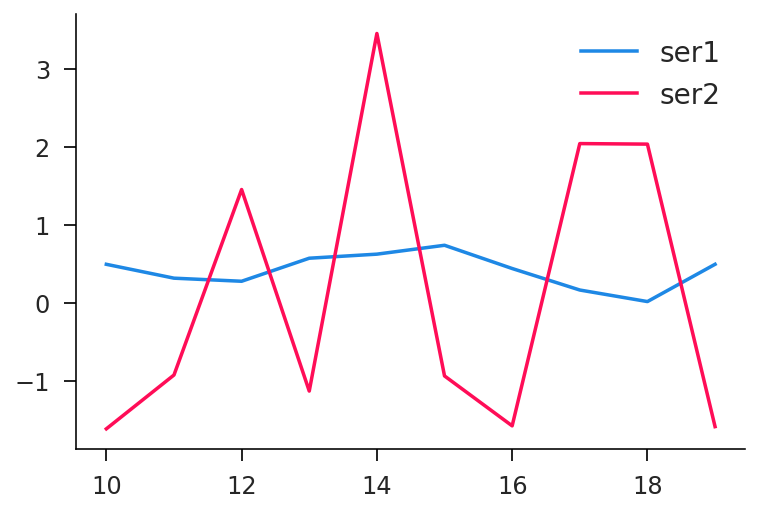

In [16]:
df.plot();

In [17]:
df['ser1']

10    0.494890
11    0.317087
12    0.277555
13    0.572831
14    0.624877
15    0.738665
16    0.440887
17    0.165287
18    0.017351
19    0.495063
Name: ser1, dtype: float64

In [18]:
df['ser1'] > 0.5

10    False
11    False
12    False
13     True
14     True
15     True
16    False
17    False
18    False
19    False
Name: ser1, dtype: bool

In [19]:
df1 = df[df['ser1']>0.5]
df1

,ser1,ser2
13,0.572831,-1.129546
14,0.624877,3.452402
15,0.738665,-0.935460


In [20]:
df.query('ser1 > 0.5')

,ser1,ser2
13,0.572831,-1.129546
14,0.624877,3.452402
15,0.738665,-0.935460


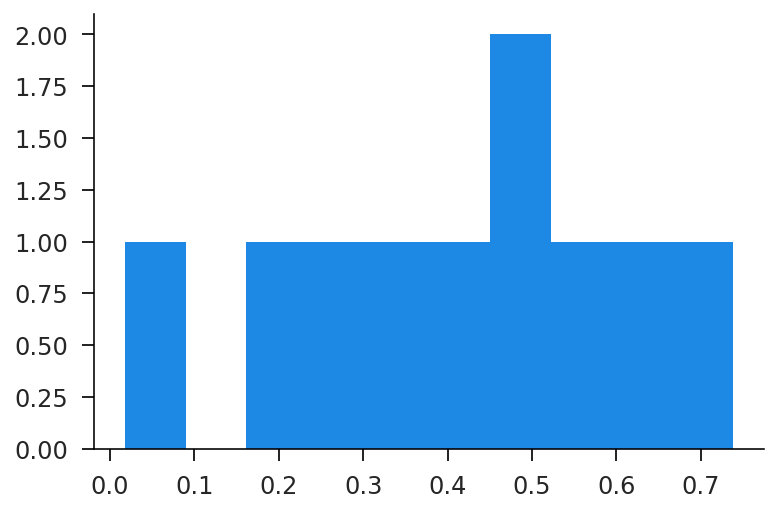

In [21]:
df['ser1'].hist(grid=False);

## Grouping Data

In [22]:
# make some fake data
N = 100
block = np.random.randint(4, size=N)
cmean = np.array([0.1, 0.2, 0.3, 0.4])
cvars = np.array([0.2, 0.1, 0.5, 0.2])
value = cmean[block]+np.random.randn(N)*cvars[block]
df = pd.DataFrame({
    'block': block,
    'value': value
})

In [23]:
df.head(10)

,block,value
0,1,0.149263
1,2,-0.239557
2,1,0.174521
3,2,0.301383
4,2,0.786244
5,2,0.268727
6,1,0.117204
7,3,0.411629
8,2,0.652120
9,3,0.209837


In [24]:
df.groupby('block').size()

block
0    28
1    19
2    29
3    24
dtype: int64

In [25]:
df.groupby('block')['value'].mean()

block
0    0.122772
1    0.199390
2    0.307776
3    0.359788
Name: value, dtype: float64

In [26]:
df.groupby('block')['value'].std()

block
0    0.202554
1    0.089381
2    0.450107
3    0.143683
Name: value, dtype: float64

In [27]:
df.groupby('block')['value'].apply(lambda x: np.mean(np.abs(x-np.mean(x))))

block
0    0.176462
1    0.069063
2    0.355435
3    0.107167
Name: value, dtype: float64

In [28]:
grp = df.groupby('block')['value']
pd.DataFrame({
    'mean': grp.mean(),
    'stdv': grp.std(),
    'absd': grp.apply(lambda x: np.mean(np.abs(x-np.mean(x))))
})

,mean,stdv,absd
block,,,
0,0.122772,0.202554,0.176462
1,0.199390,0.089381,0.069063
2,0.307776,0.450107,0.355435
3,0.359788,0.143683,0.107167


## Time Series

In [29]:
ret = 0.05 # yearly return
vol = 0.1 # yearly volatility

In [30]:
days = pd.date_range('2016-01-01', '2016-12-31', freq='D')
N = len(days)
T = (days.max()-days.min()).days/365.25
delt = T/N

In [31]:
vals = vol*np.sqrt(delt)*np.cumsum(np.random.randn(N))
df = pd.DataFrame({
    'date': days,
    'price': vals
}).set_index('date')
df.head()

,price
date,
2016-01-01,0.006803
2016-01-02,0.002718
2016-01-03,-0.002660
2016-01-04,-0.006068
2016-01-05,-0.007779


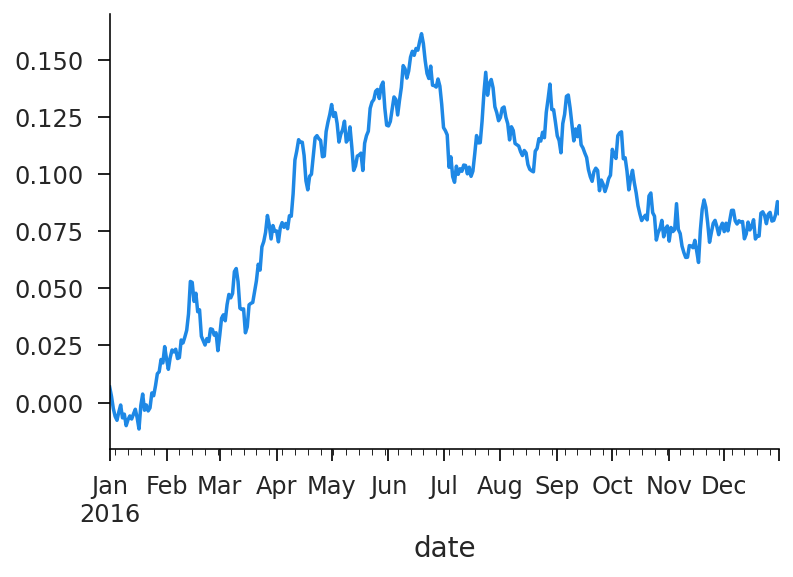

In [32]:
df['price'].plot();

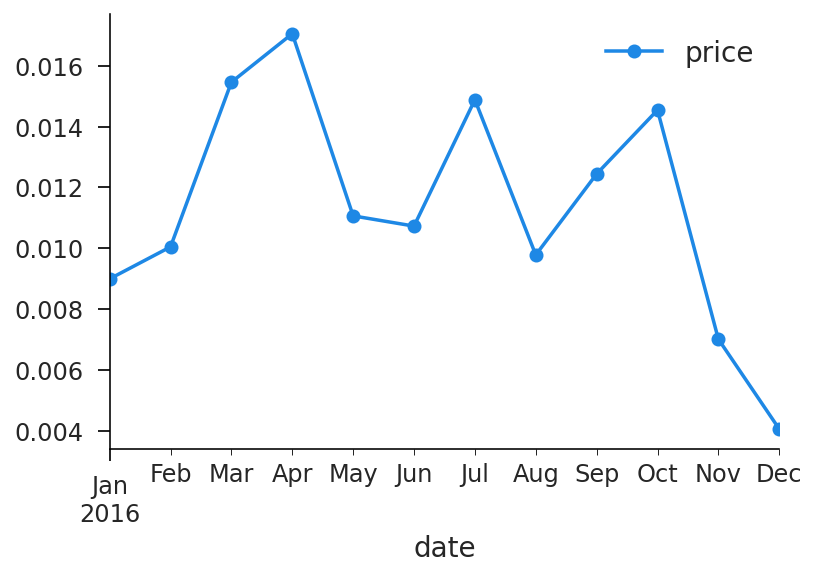

In [33]:
df.groupby(pd.Grouper(freq='MS')).std().plot(marker='o');

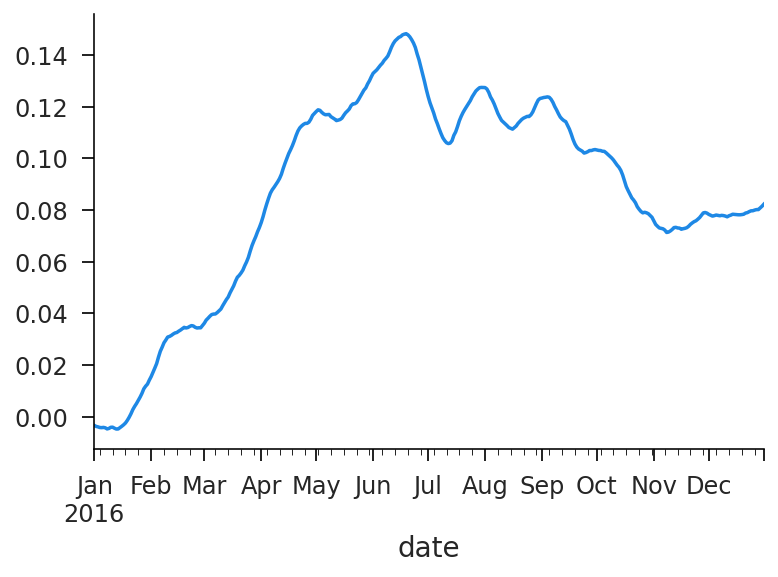

In [34]:
df.rolling(20, center=True, min_periods=5).mean().plot(legend=False);

## Transforming

In [35]:
ret = 0.05 # yearly return
vol = 0.1 # yearly volatility

In [36]:
days = pd.date_range('2006-01-01', '2016-12-31', freq='D')
N = len(days)
T = (days.max()-days.min()).days/365.25
delt = T/N

In [37]:
vals = vol*np.sqrt(delt)*np.cumsum(np.random.randn(len(days)))
df = pd.DataFrame({
    'date': days,
    'price': vals
}).set_index('date')

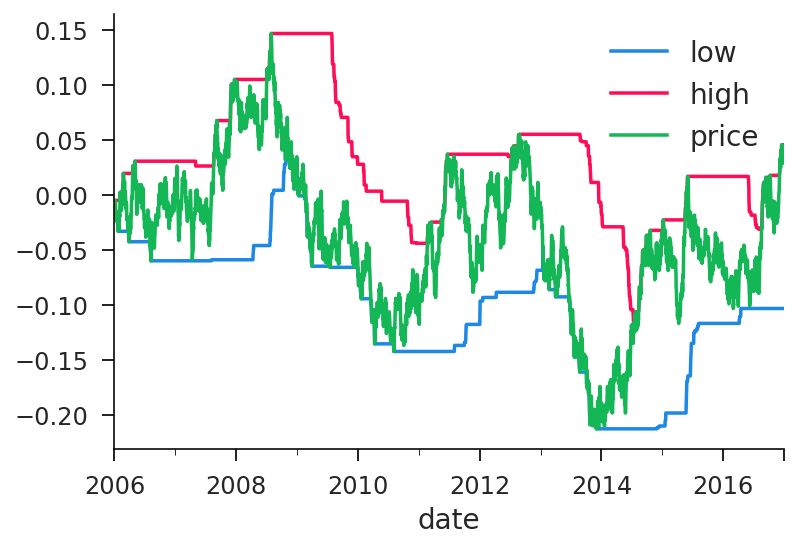

In [38]:
roll = df['price'].rolling(52*7, min_periods=1)
pd.DataFrame({
    'low' : roll.min(),
    'high': roll.max(),
    'price': df['price']
}).plot();

## Plotting

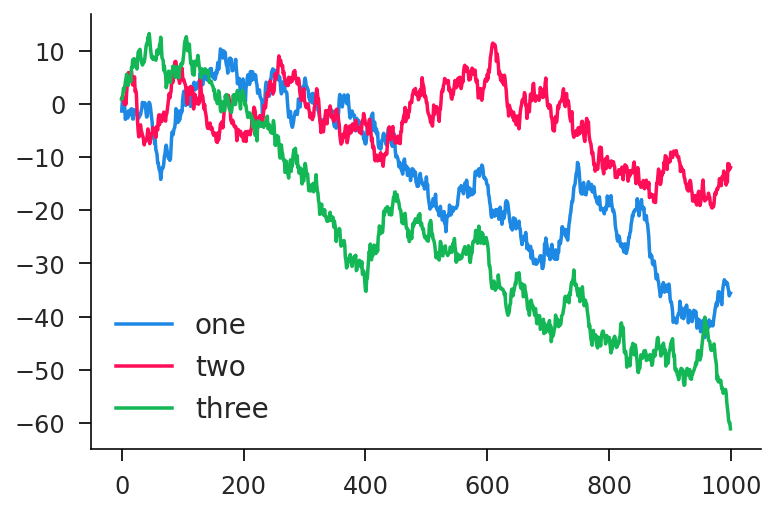

In [39]:
# good way to arrange plots
pd.DataFrame({
    'one': np.cumsum(np.random.randn(1000)),
    'two': np.cumsum(np.random.randn(1000)),
    'three': np.cumsum(np.random.randn(1000))
}).plot();

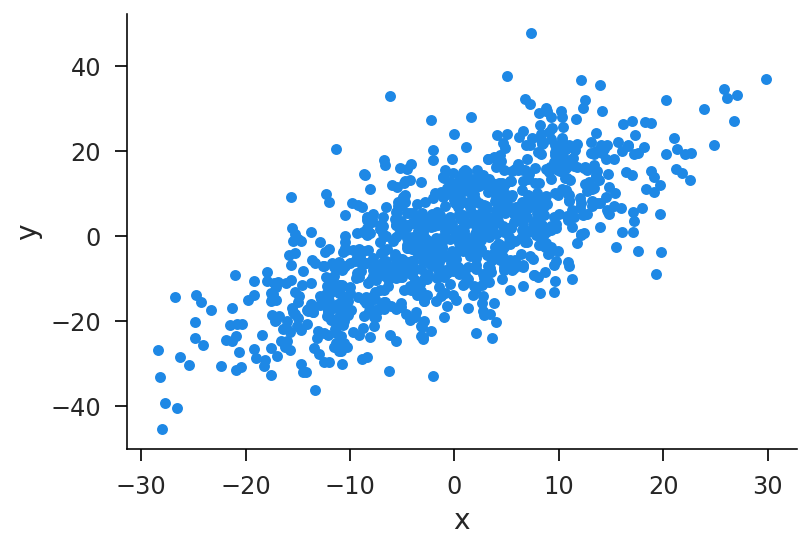

In [40]:
x = 10*np.random.randn(1000)
y = x + 10*np.random.randn(1000)
df = pd.DataFrame({
    'x': x,
    'y': y
})
df.plot.scatter(x='x', y='y');

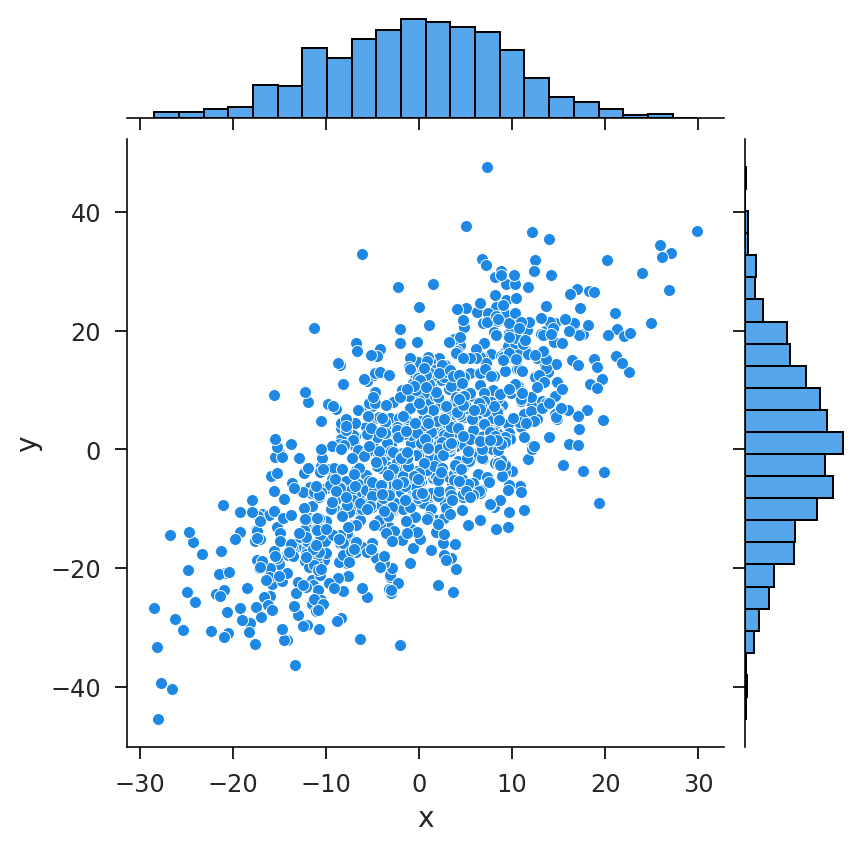

In [41]:
sns.jointplot('x', 'y', data=df);

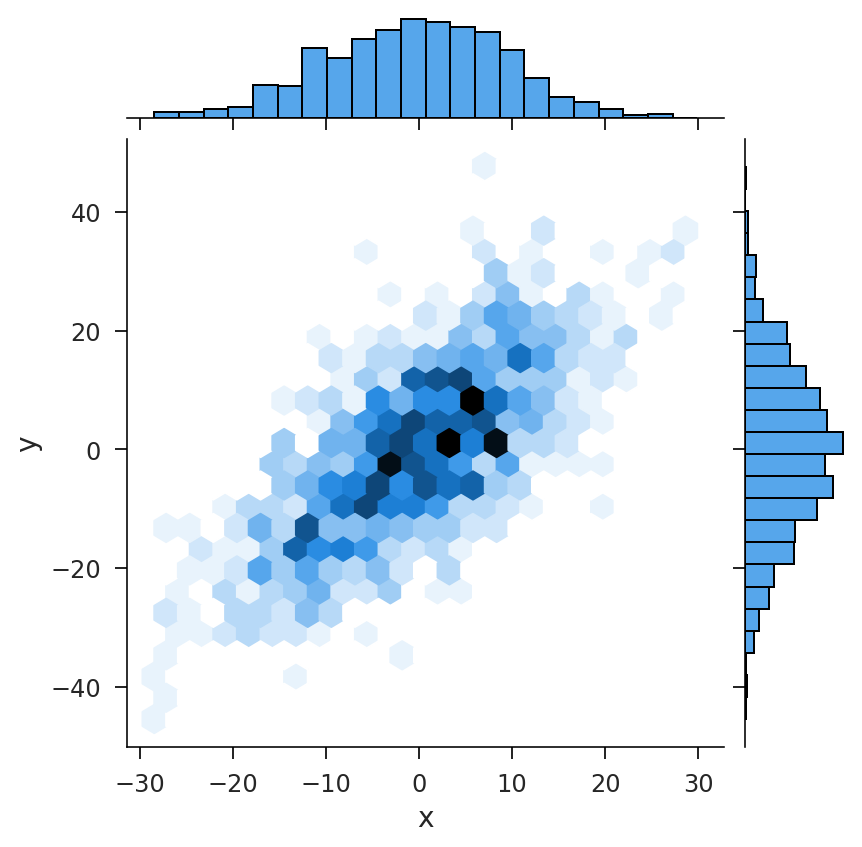

In [42]:
# kind in ['scatter', 'reg', 'resid', 'kde', 'hex']
sns.jointplot('x', 'y', kind='hex', data=df);

## Indexing

In [43]:
df = pd.DataFrame({
    'a': np.arange(10),
    'b': np.random.rand(10)
}, index=np.arange(10, 20))
df

,a,b
10,0,0.769174
11,1,0.122441
12,2,0.060925
13,3,0.094173
14,4,0.322079
15,5,0.727298
16,6,0.935998
17,7,0.371108
18,8,0.141911
19,9,0.286274


In [44]:
# slicing on index
df.loc[14]

a    4.000000
b    0.322079
Name: 14, dtype: float64

In [45]:
# slicing on location
df.iloc[4]

a    4.000000
b    0.322079
Name: 14, dtype: float64

In [46]:
# slicing on column
df['a']

10    0
11    1
12    2
13    3
14    4
15    5
16    6
17    7
18    8
19    9
Name: a, dtype: int64

In [47]:
# selecting
df[df['a']>5]

,a,b
16,6,0.935998
17,7,0.371108
18,8,0.141911
19,9,0.286274


In [48]:
# advanced selecting
df[(df['a']>3)&(df['a']<8)]

,a,b
14,4,0.322079
15,5,0.727298
16,6,0.935998
17,7,0.371108


In [49]:
# selection mechanism
df['a'] > 3

10    False
11    False
12    False
13    False
14     True
15     True
16     True
17     True
18     True
19     True
Name: a, dtype: bool

In [50]:
# querying
df.query('a > 3 and a < 8')

,a,b
14,4,0.322079
15,5,0.727298
16,6,0.935998
17,7,0.371108


## Joining

In [51]:
mapp = pd.Series({x: 2*x for x in range(10)}, name='twox')
mapp

0     0
1     2
2     4
3     6
4     8
5    10
6    12
7    14
8    16
9    18
Name: twox, dtype: int64

In [52]:
init = pd.DataFrame({
    'ser': np.random.randint(10, size=100),
    'val': np.random.rand(100)
})
init.head()

,ser,val
0,7,0.920719
1,8,0.550820
2,9,0.661388
3,1,0.124876
4,9,0.274556


In [53]:
final = init.join(mapp, on='ser')
final.head()

,ser,val,twox
0,7,0.920719,14
1,8,0.550820,16
2,9,0.661388,18
3,1,0.124876,2
4,9,0.274556,18


In [54]:
final['check'] = final['twox'] == 2*final['ser']
final.head()

,ser,val,twox,check
0,7,0.920719,14,True
1,8,0.550820,16,True
2,9,0.661388,18,True
3,1,0.124876,2,True
4,9,0.274556,18,True


In [55]:
print(final['check'].all())

True


### Stack and unstack (and some pivot)

In [56]:
a = [0, 1, 2]
b = [1, 2, 3]
list(zip(a, b))

[(0, 1), (1, 2), (2, 3)]

In [57]:
# this constructs a family structure table
M, N = 5, 12
from itertools import cycle
cmap = list(zip(cycle(range(M)), range(100, 100+N), np.random.rand(N)))
pmap = pd.DataFrame(cmap, columns=['pid', 'cid', 'income'])
pmap = pmap.sort_values('pid').reset_index(drop=True)
pmap

,pid,cid,income
0,0,100,0.167519
1,0,105,0.316932
2,0,110,0.317156
3,1,101,0.224637
4,1,106,0.834977
5,1,111,0.044394
6,2,102,0.971444
7,2,107,0.744098
8,3,103,0.678470
9,3,108,0.926913


In [58]:
# tabulate the order of each child
pmap['order'] = pmap.groupby('pid').cumcount().apply(lambda x: f'child{x}')
ptab = pmap.set_index(['pid', 'order'])
ptab

cid    income
pid order                
0   child0  100  0.167519
    child1  105  0.316932
    child2  110  0.317156
1   child0  101  0.224637
    child1  106  0.834977
    child2  111  0.044394
2   child0  102  0.971444
    child1  107  0.744098
3   child0  103  0.678470
    child1  108  0.926913
4   child0  104  0.287621
    child1  109  0.810528

In [59]:
fam = ptab.unstack(level=1)
fam

cid                  income                    
order child0 child1 child2    child0    child1    child2
pid                                                     
0      100.0  105.0  110.0  0.167519  0.316932  0.317156
1      101.0  106.0  111.0  0.224637  0.834977  0.044394
2      102.0  107.0    NaN  0.971444  0.744098       NaN
3      103.0  108.0    NaN  0.678470  0.926913       NaN
4      104.0  109.0    NaN  0.287621  0.810528       NaN

In [60]:
# the reverse operation gives us (almost) what we started with
fam.stack(level='order')

cid    income
pid order                  
0   child0  100.0  0.167519
    child1  105.0  0.316932
    child2  110.0  0.317156
1   child0  101.0  0.224637
    child1  106.0  0.834977
    child2  111.0  0.044394
2   child0  102.0  0.971444
    child1  107.0  0.744098
3   child0  103.0  0.678470
    child1  108.0  0.926913
4   child0  104.0  0.287621
    child1  109.0  0.810528

In [61]:
# we can do this with pivot too
ptab.reset_index().pivot('pid', 'order', ['cid', 'income'])

cid                  income                    
order child0 child1 child2    child0    child1    child2
pid                                                     
0      100.0  105.0  110.0  0.167519  0.316932  0.317156
1      101.0  106.0  111.0  0.224637  0.834977  0.044394
2      102.0  107.0    NaN  0.971444  0.744098       NaN
3      103.0  108.0    NaN  0.678470  0.926913       NaN
4      104.0  109.0    NaN  0.287621  0.810528       NaN

## Networks

In [62]:
import networkx as nx

In [63]:
df = pd.DataFrame({
    'src': np.random.randint(10, size=20),
    'dst': np.random.randint(10, size=20),
    'wgt': np.random.exponential(size=20)
})
df = df.drop_duplicates(subset=['src', 'dst'])
df = df.query('src != dst')
df.head()

,src,dst,wgt
0,2,9,0.819252
1,6,7,0.900267
2,9,0,1.152056
3,3,0,2.558216
4,9,8,1.483103


In [64]:
G = nx.Graph()
G.add_nodes_from(np.arange(10))
G.add_weighted_edges_from([(x['src'], x['dst'], x['wgt']) for i, x in df.iterrows()])
# G.add_weighted_edges_from(df[['src', 'dst', 'wgt']].values) # equivalent
G

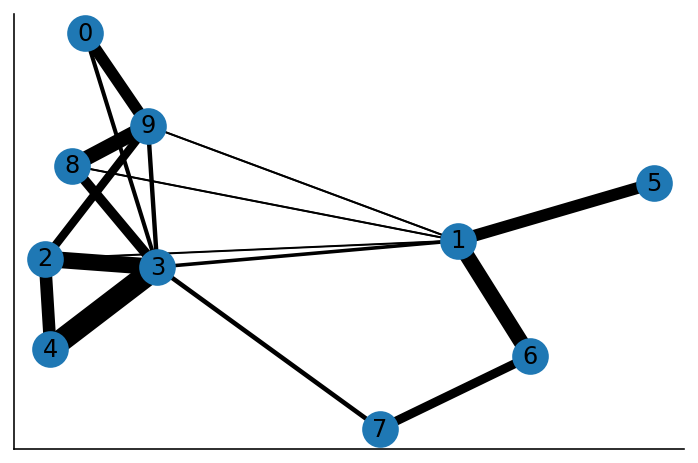

In [65]:
edgewidth = [5*d['weight'] for (u,v,d) in G.edges(data=True)]
pos = nx.spring_layout(G, iterations=50)
nx.draw_networkx(G, pos);
nx.draw_networkx_edges(G, pos, width=edgewidth);

In [66]:
nx.centrality.eigenvector.eigenvector_centrality(G, weight='weight')

{0: 0.14742461294299822,
 1: 0.12486782238389495,
 2: 0.4592469756670552,
 3: 0.5916082319557805,
 4: 0.4774206578368032,
 5: 0.03701885971464356,
 6: 0.0659217131277728,
 7: 0.08271922928428663,
 8: 0.2627303823331065,
 9: 0.3037262718215929}

## Input/Output

In [67]:
df = pd.DataFrame({
    'one': np.cumsum(np.random.randn(1000)),
    'two': np.cumsum(np.random.randn(1000)),
    'three': np.cumsum(np.random.randn(1000))
})
df.to_csv('output/series.csv', index=False)

In [68]:
!head output/series.csv

one,two,three
0.17802708484656754,-0.24334757939899446,-0.6724553470351943
-2.7269693551918386,-0.831867448877968,-2.2316484447024876
-4.232347742411665,-1.2984090797833603,-2.4898588075182158
-3.7368957339778732,-3.258686734649693,-2.786016194490912
-2.297492355894951,-3.2241926627302284,-1.6065164327193022
-2.2597740143347345,-3.731961224052082,-2.8370874888167554
-1.550554994773775,-2.1457770946007653,-2.6692224548854306
0.6110858689241971,-1.9928241430563856,-3.835657782204401
0.5623557305596281,-1.2879287071001921,-4.491044856605897


In [69]:
df = pd.read_csv('output/series.csv')
df.head()

,one,two,three
0,0.178027,-0.243348,-0.672455
1,-2.726969,-0.831867,-2.231648
2,-4.232348,-1.298409,-2.489859
3,-3.736896,-3.258687,-2.786016
4,-2.297492,-3.224193,-1.606516


Can also use the many `pd.DataFrame.to_*` and `pd.read_*` function where `*` is one of:
- csv
- excel
- json
- html
- latex
- stata
- sql

## External Data

In [70]:
import pandas_datareader as pdr

In [71]:
emp = pdr.fred.FredReader(['UNRATE', 'LNS12300060'], start='1948-01-01').read()
emp = emp.rename(columns={'UNRATE': 'unemp', 'LNS12300060': 'empop'}).rename_axis('date')
emp.head()

,unemp,empop
date,,
1948-01-01,3.4,62.6
1948-02-01,3.8,62.7
1948-03-01,4.0,62.6
1948-04-01,3.9,62.9
1948-05-01,3.5,62.5


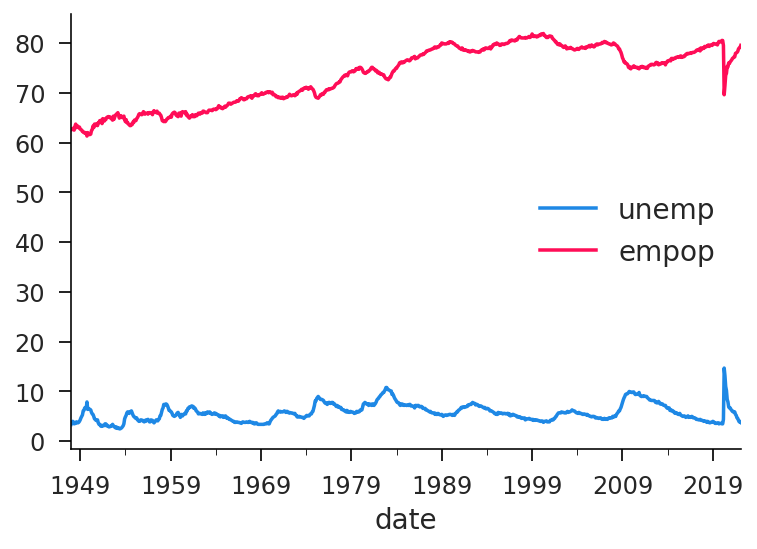

In [72]:
emp.plot();

In [73]:
# detrender
def detrend(s):
    name = s.name
    df = s.reset_index()
    df['year'] = df['date'].dt.year
    ret = smf.ols(f'{name} ~ 1 + year', data=df.reset_index()).fit()
    pred = pd.Series(ret.predict(), index=s.index)
    return s - pred

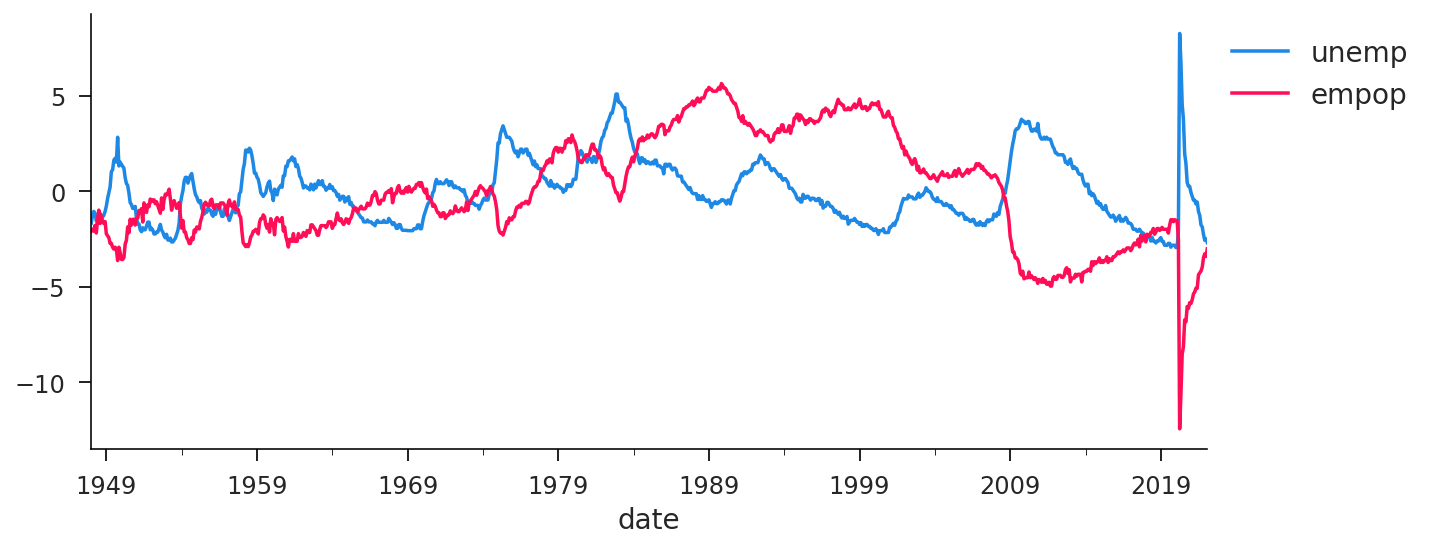

In [74]:
emp.apply(detrend).plot(figsize=(10, 4));
plt.legend(bbox_to_anchor=(1.0, 1.0));

In [75]:
# detrend poly!
def detrendn(s, deg=1):
    name = s.name
    df = s.reset_index()
    df['year'] = df['date'].dt.year
    df['zyear'] = df['year'] - df['year'].min()
    reg = []
    for n in range(deg+1):
        ds = f'year{n}'
        df[ds] = df['zyear']**n
        reg.append(ds)
    reg = f'{name} ~ ' + ' + '.join(reg)
    ret = smf.ols(reg, data=df).fit()
    pred = pd.Series(ret.predict(), index=s.index)
    return s - pred

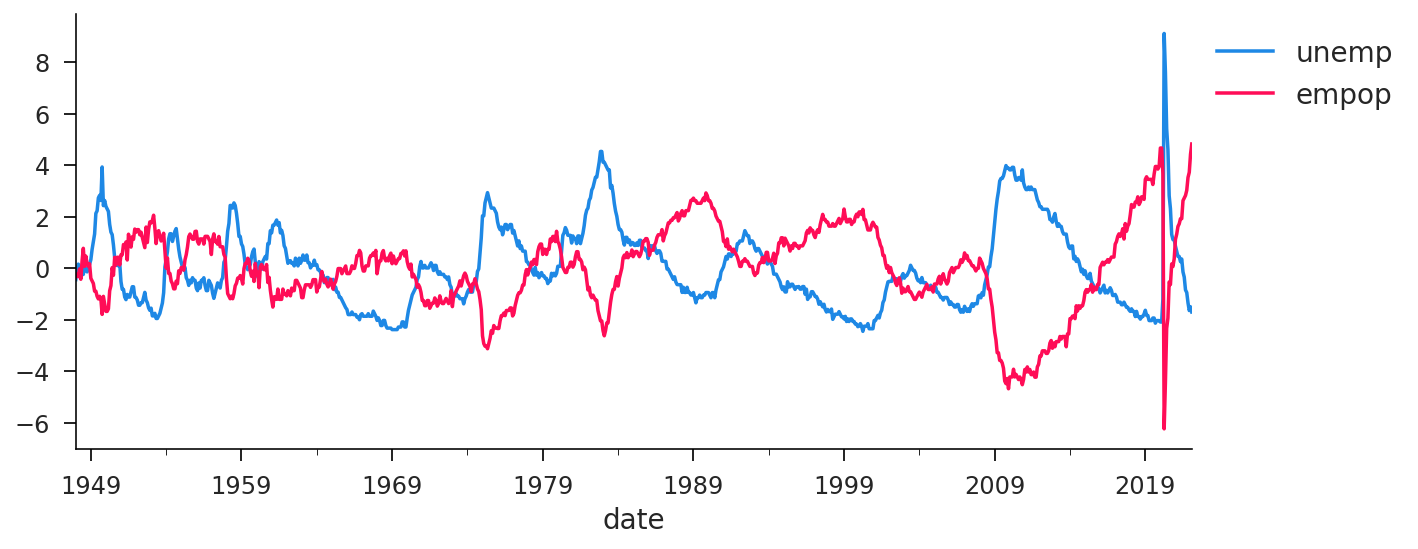

In [76]:
emp.apply(lambda s: detrendn(s, deg=3)).plot(figsize=(10, 4));
plt.legend(bbox_to_anchor=(1.0, 1.0));

In [77]:
# let's not reinvent the wheel
def detrendn1(s, deg=1):
    year = s.index.year
    zyear = year - year.min()
    coef = np.polyfit(zyear, s, deg)
    vals = np.polyval(coef, zyear)
    pred = pd.Series(vals, index=s.index, name=s.name)
    return s - pred

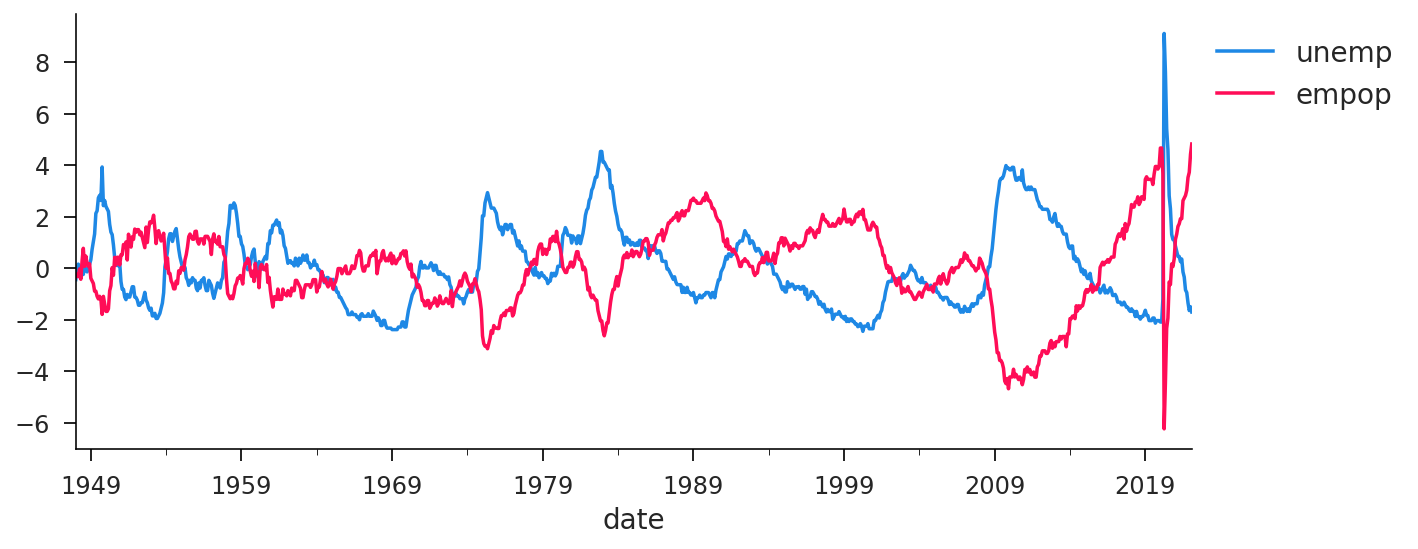

In [78]:
emp.apply(lambda s: detrendn1(s, deg=3)).plot(figsize=(10, 4));
plt.legend(bbox_to_anchor=(1.0, 1.0));

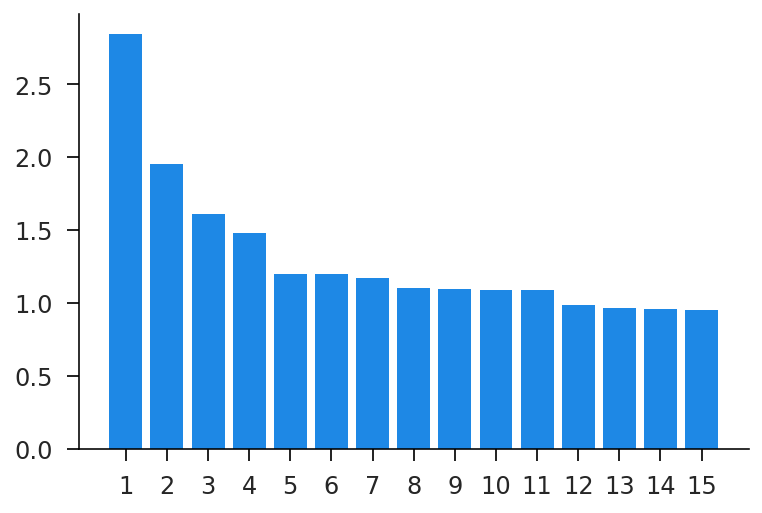

In [79]:
dvec = np.arange(1, 15+1)
plt.bar(dvec, [np.std(detrendn1(emp['empop'], deg=d)) for d in dvec]);
plt.xticks(dvec);

# Regressions

In [80]:
import statsmodels.formula.api as smf

## Basic

In [94]:
N = 100
x = np.random.randn(N)
y = 3*np.random.randn(N)
z = 1 + 2*x + 3*y + 4*x*y + np.random.randn(N)
df0 = pd.DataFrame({
    'x': x,
    'y': y,
    'z': z
})

In [95]:
ret = smf.ols('z ~ 1 + x + y', data=df0).fit()
ret.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      z   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     59.63
Date:                Tue, 22 Mar 2022   Prob (F-statistic):           1.30e-17
Time:                        11:52:32   Log-Likelihood:                -375.40
No. Observations:                 100   AIC:                             756.8
Df Residuals:                      97   BIC:                             764.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1996      1.063      0.188      0.852      -1.911       2.310
x              2.0908      1.154      1.811      0.073      -0.200       4.382
y              3.5856      0.331     10.833      0.000       2.929       4.243
==============================================================================
Omnibus:                       18.925   Durbin-Watson:                   1.810
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.730
Skew:                          -0.526   Prob(JB):                     2.91e-13
Kurtosis:                       6.570   Cond. No.                         3.55
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [96]:
ret.params

Intercept    0.199602
x            2.090808
y            3.585595
dtype: float64

In [97]:
ret = smf.ols('z ~ 1 + x*y', data=df0).fit()
ret.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      z   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     7870.
Date:                Tue, 22 Mar 2022   Prob (F-statistic):          1.13e-114
Time:                        11:52:37   Log-Likelihood:                -140.03
No. Observations:                 100   AIC:                             288.1
Df Residuals:                      96   BIC:                             298.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9540      0.102      9.367      0.000       0.752       1.156
x              1.9951      0.110     18.094      0.000       1.776       2.214
y              3.0083      0.032     93.685      0.000       2.945       3.072
x:y            3.9809      0.039    102.649      0.000       3.904       4.058
==============================================================================
Omnibus:                        1.921   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.383   Jarque-Bera (JB):                1.411
Skew:                           0.038   Prob(JB):                        0.494
Kurtosis:                       2.423   Cond. No.                         3.63
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

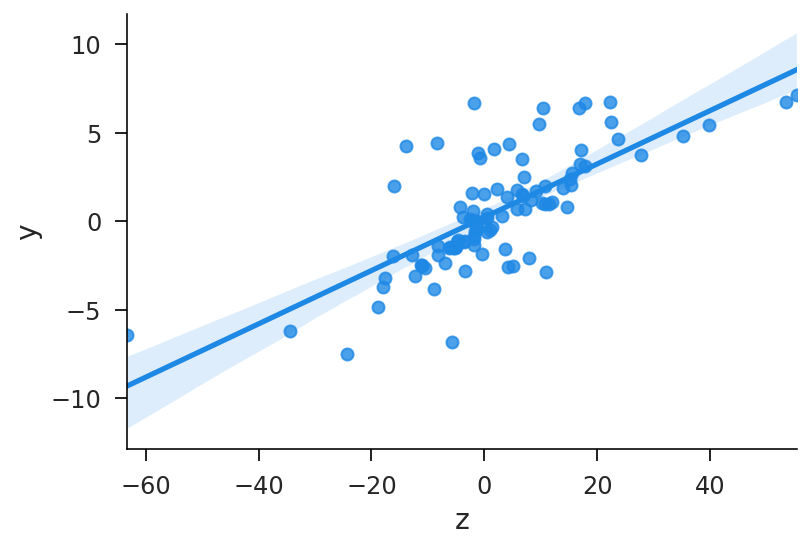

In [98]:
sns.regplot('z', 'y', data=df0);

## Categorical

In [111]:
import fastreg as fr
from fastreg import I, R, C

In [117]:
# make some fake data
N = 100
block = np.random.randint(4, size=N)
cmean = np.array([0.1, 0.2, 0.3, 0.4])
cvars = np.array([0.2, 0.1, 0.5, 0.2])
value = cmean[block] + np.random.randn(N)*cvars[block]
df1 = pd.DataFrame({
    'block': block,
    'value': value
})

In [118]:
fr.ols(y=R.z, x=I + R.x + R.y, data=df0)

z,coeff,stderr,low95,high95,pvalue
I,0.199602,1.063484,-1.884788,2.283992,0.851122
x,2.090808,1.154402,-0.171778,4.353395,0.070116
y,3.585595,0.330993,2.936860,4.234329,0.000000


In [119]:
fr.ols(y=R.z, x=I + R.x + R.y + R.x*R.y, data=df0)

z,coeff,stderr,low95,high95,pvalue
I,0.953960,0.101842,0.754353,1.153567,0.0
x,1.995139,0.110264,1.779024,2.211253,0.0
y,3.008290,0.032111,2.945354,3.071225,0.0
x*y,3.980861,0.038781,3.904851,4.056872,0.0


In [120]:
fr.ols(y=R.value, x=I + C.block, data=df1)

value,coeff,stderr,low95,high95,pvalue
I,-0.027347,0.057208,-0.139473,0.084780,0.632639
block=1,0.254079,0.081679,0.093991,0.414167,0.001866
block=2,0.231635,0.085378,0.064297,0.398973,0.006667
block=3,0.386206,0.082507,0.224495,0.547917,0.000003


## Bootstrapping

In [89]:
from sklearn.utils import resample

In [90]:
def gen_block_data(N, cmean, cvars):
    cmean = np.array(cmean)
    cvars = np.array(cvars)
    block = np.random.randint(len(cmean), size=N)
    value = cmean[block] + np.random.randn(N)*cvars[block]
    return pd.DataFrame({
        'block': block,
        'value': value
    })

In [91]:
N = 100
K = 1000
cmean = [0.1, 0.2, 0.3, 0.4]
cvars = [0.2, 0.1, 0.5, 0.2]
mygen = lambda: gen_block_data(N, cmean, cvars)
myeqn = 'value ~ 0 + C(block)'
data0 = mygen()
mysamp = lambda: resample(data0)

In [92]:
res = pd.DataFrame({i: smf.ols(myeqn, data=mygen()).fit().params for i in range(K)}).T
res.columns = ['b0', 'b1', 'b2', 'b3']
stderr_bsp0 = res.std().values

In [93]:
res = pd.DataFrame({i: smf.ols(myeqn, data=mysamp()).fit().params for i in range(K)}).T
res.columns = ['b0', 'b1', 'b2', 'b3']
stderr_bsp = res.std().values

In [94]:
pd.DataFrame({
    'stderr_reg': stderr_reg,
    'stderr_rob': stderr_rob,
    'stderr_bsp0': stderr_bsp0,
    'stderr_bsp': stderr_bsp
}).T

,0,1,2,3
stderr_reg,0.060345,0.057977,0.059125,0.059125
stderr_rob,0.037564,0.021084,0.098848,0.043263
stderr_bsp0,0.042311,0.019719,0.101676,0.040535
stderr_bsp,0.037742,0.018458,0.082288,0.037775


In [95]:
(2*(1/(stderr_bsp0/cvars)))**2/N

array([0.89373546, 1.02872897, 0.96731333, 0.97376725])

## MAPS

In [96]:
import geopandas as gpd
from ipywidgets import interact, IntSlider

In [97]:
pref_hist = gpd.read_file('/media/totoro/data/china_maps/history/v6_time_pref_pgn_utf_wgs84.shp')
pref_hist = pref_hist.rename(columns={
    'NAME_CH': 'name_zh',
    'NAME_PY': 'name_en',
    'BEG_YR': 'beg_yr',
    'END_YR': 'end_yr'
})[['name_zh', 'name_en', 'beg_yr', 'end_yr', 'geometry']]
print(len(pref_hist))
pref_hist.head()

3830


,name_zh,name_en,beg_yr,end_yr,geometry
0,辽州,Liao Zhou,1151,1217,"POLYGON ((113.54941 36.75454, 113.54329 36.752..."
1,沁州,Qin Zhou,1129,1217,"MULTIPOLYGON (((112.00320 36.84234, 112.00954 ..."
2,霍州,Huo Zhou,1772,1911,"MULTIPOLYGON (((111.85910 36.44626, 111.86777 ..."
3,南泽州,Nanzhe Zhou,1128,1150,"POLYGON ((113.23645 35.44530, 113.22804 35.444..."
4,泽州,Zezhou Fu,1151,1217,"POLYGON ((113.23645 35.44530, 113.22804 35.444..."


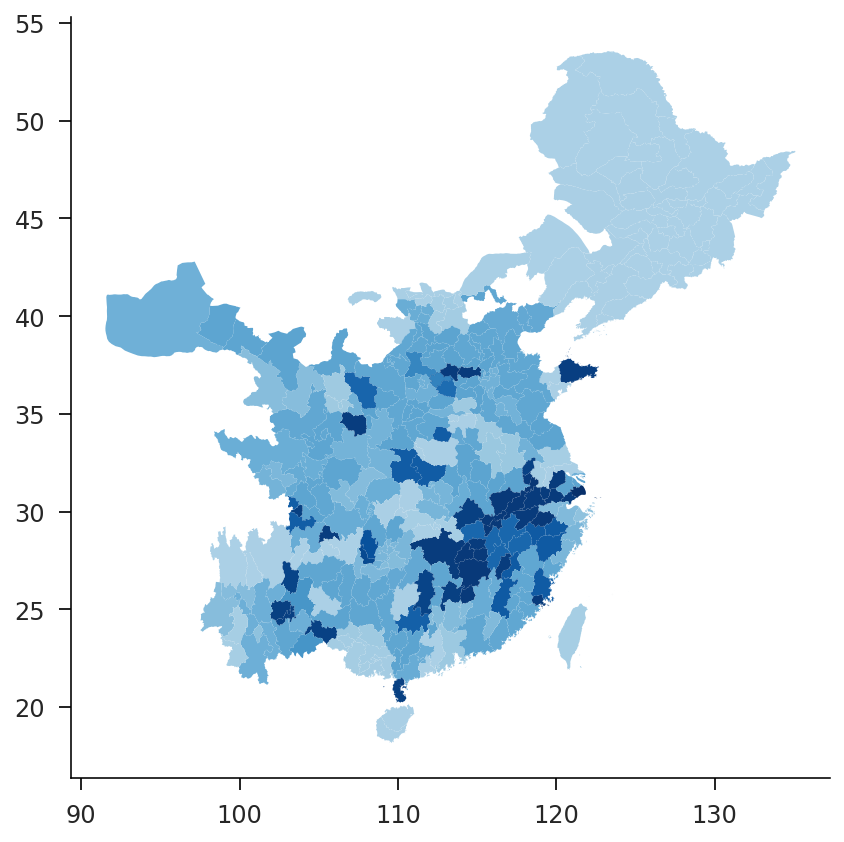

In [98]:
pref_1911 = pref_hist.query('beg_yr < 1911 and end_yr >= 1911')
pref_1911.plot(column='beg_yr', cmap='Blues_r', vmax=2200, figsize=(7, 7));

In [99]:
def plot_year(yr):
    df = pref_hist.query(f'beg_yr <= {yr} and end_yr >= {yr}')
    df['age'] = yr - df['beg_yr']
    yrmax = df['age'].max()
    fig, ax = plt.subplots(figsize=(7, 7))
    df.plot(column='age', cmap='Blues', ax=ax, vmin=-100, vmax=600);
    ax.set_xlim(85, 135)
    ax.set_ylim(15, 50)
    ax.set_aspect('equal')
interact(plot_year, yr=IntSlider(min=-224, max=1911, value=1900));

interactive(children=(IntSlider(value=1900, description='yr', max=1911, min=-224), Output()), _dom_classes=('w…

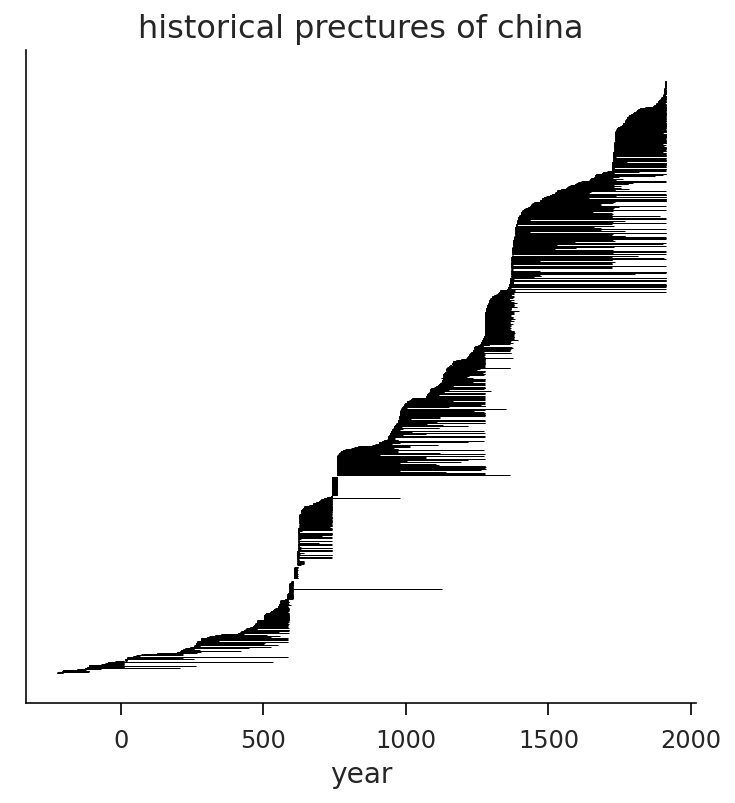

In [100]:
fig, ax = plt.subplots(figsize=(6, 6))
pref_range = pref_hist.sort_values('beg_yr')[['beg_yr', 'end_yr']].set_index(np.arange(len(pref_hist)))
for (i, (b, e)) in pref_range.iterrows():
    ax.hlines(i, b, e, linewidth=0.5)
ax.yaxis.set_visible(False);
ax.set_xlabel('year');
ax.set_title('historical prectures of china');

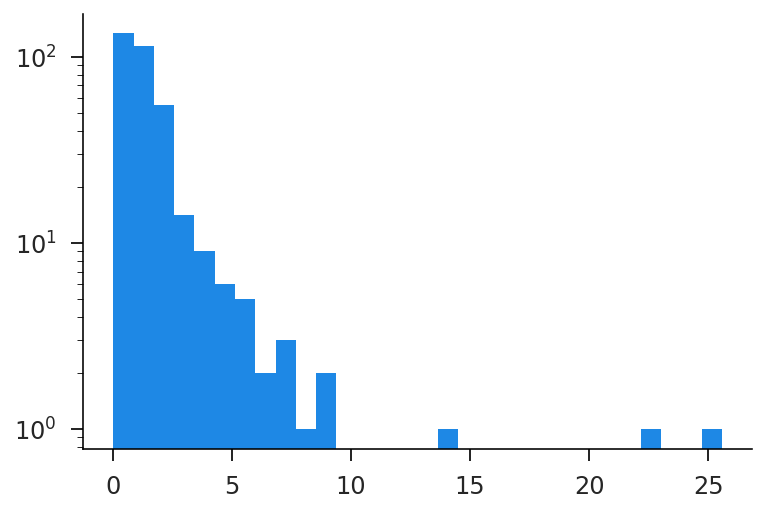

In [101]:
pref_hist.query('end_yr == 1911').area.hist(log=True, bins=30, grid=False);

### Advanced

In [102]:
year = 1776
pref_old = pref_hist.query(f'beg_yr <= {year} and end_yr >= {year}')
pref_old = pref_old[pref_old.is_valid]
pref_old.head()

,name_zh,name_en,beg_yr,end_yr,geometry
2,霍州,Huo Zhou,1772,1911,"MULTIPOLYGON (((111.85910 36.44626, 111.86777 ..."
184,郧阳府,Yunyang Fu,1476,1911,"POLYGON ((110.91881 31.66655, 110.90642 31.662..."
185,襄阳府,Xiangyang Fu,1476,1911,"POLYGON ((112.65113 31.66701, 112.65419 31.657..."
186,德安府,De'an Fu,1729,1911,"POLYGON ((113.91801 31.39151, 113.91645 31.384..."
187,汉阳府,Hanyang Fu,1763,1911,"POLYGON ((114.35085 30.68763, 114.35251 30.686..."


In [103]:
pref_new = gpd.read_file('/media/totoro/data/china_maps/modern/CHN_adm2.shp')
pref_new = pref_new.rename(columns={
    'NL_NAME_2': 'name_zh',
    'VARNAME_2': 'name_en',
})[['name_zh', 'name_en', 'geometry']]
pref_new.head()

,name_zh,name_en,geometry
0,安庆市,Ānqìng,"POLYGON ((117.11557 31.16616, 117.11788 31.160..."
1,蚌埠市,Bèngbù,"POLYGON ((117.26205 33.49959, 117.28395 33.497..."
2,亳州市,Bózhōu,"POLYGON ((115.73950 34.07428, 115.74284 34.072..."
3,巢湖市,Cháohú,"POLYGON ((118.36978 31.92897, 118.37383 31.924..."
4,池州市,Chízhōu,"POLYGON ((117.97800 30.82234, 117.97175 30.816..."


In [104]:
# choose a random modern prefecture
pref_samp = pref_new.query('name_zh == "成都市"')
name_zh, name_en = pref_samp.iloc[0][['name_zh', 'name_en']]
print(name_zh, name_en)

成都市 Chéngdū


In [106]:
# efficiently find the intersection with old provinces
xmin, ymin, xmax, ymax = pref_samp.iloc[[0]].total_bounds
old_subset = pref_old.cx[xmin:xmax, ymin:ymax]
print(len(old_subset))
inter = gpd.overlay(old_subset[['name_en', 'name_zh', 'geometry']], pref_samp, how='intersection')
print(inter[['name_en_1', 'name_zh_1']].drop_duplicates())

9
      name_en_1 name_zh_1
0       Zi Zhou        资州
1    Chengdu Lu       成都府
2  Tongchuan Fu       潼川府
3      Mei Zhou        眉州
4    Qiong Zhou        邛州
5      Mao Zhou        茂州
6     Yazhou Fu       雅州府


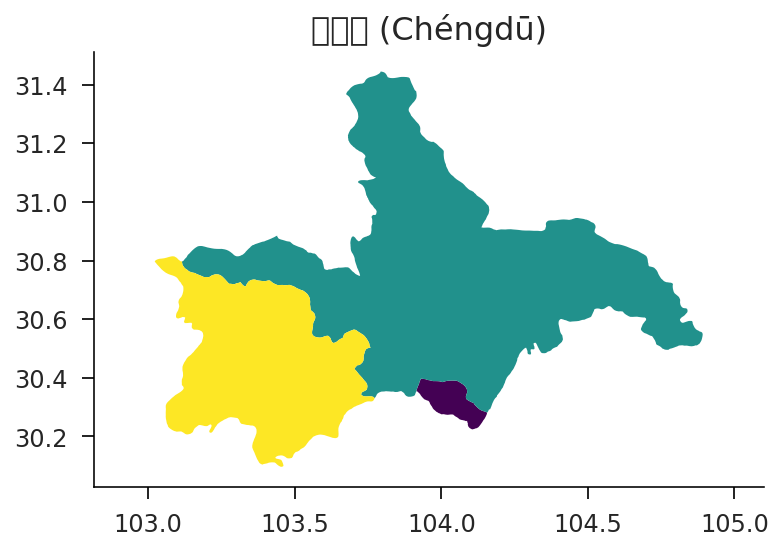

In [107]:
inter1 = inter[inter.area>0.001]
inter1['index'] = np.arange(len(inter1))
inter1.plot(column='index', cmap='viridis');
plt.title(f'{name_zh} ({name_en})');
plt.axis('equal');